In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
dataset_train = pd.read_csv(r"C:/Users/YOGESH KULKARNI/Downloads/train.csv")
dataset_test = pd.read_csv(r"C:/Users/YOGESH KULKARNI/Downloads/test.csv")
train = dataset_train
test = dataset_test

In [59]:
dataset_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
target = dataset_train['Survived']

In [60]:
train_labels = dataset_train['Survived']

In [61]:
dataset_train = dataset_train.drop(columns = ['Survived'])

In [62]:
from feature_selector import FeatureSelector


In [63]:
fs = FeatureSelector(data = dataset_train, labels = train_labels)
fs.identify_missing(missing_threshold=0.6)

1 features with greater than 0.60 missing values.



In [64]:
missing_features = fs.ops['missing']
missing_features[:10]

['Cabin']

In [65]:
fs.missing_stats.head(10)

,missing_fraction
Cabin,0.771044
Age,0.198653
Embarked,0.002245
PassengerId,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
SibSp,0.000000
Parch,0.000000
Ticket,0.000000


In [66]:
#Features having single unique value
fs.identify_single_unique()

0 features with a single unique value.



In [67]:
#Highly correlated features
fs.identify_collinear(correlation_threshold=0.975)

0 features with a correlation magnitude greater than 0.97.



In [68]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.885778	valid_0's binary_logloss: 0.397337
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.876447	valid_0's binary_logloss: 0.41053
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.879518	valid_0's binary_logloss: 0.424938
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.837822	valid_0's binary_logloss: 0.459546
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.86558	valid_0's binary_logloss: 0.642642
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.878573	valid_0's binary_logloss: 0.588323
Trai

In [69]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 11 original features
There are 1724 one-hot features


In [70]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features[10:15]

['Ticket_315090',
 'Ticket_312991',
 'Name_Abbing, Mr. Anthony',
 'Ticket_31027',
 'Ticket_3101296']

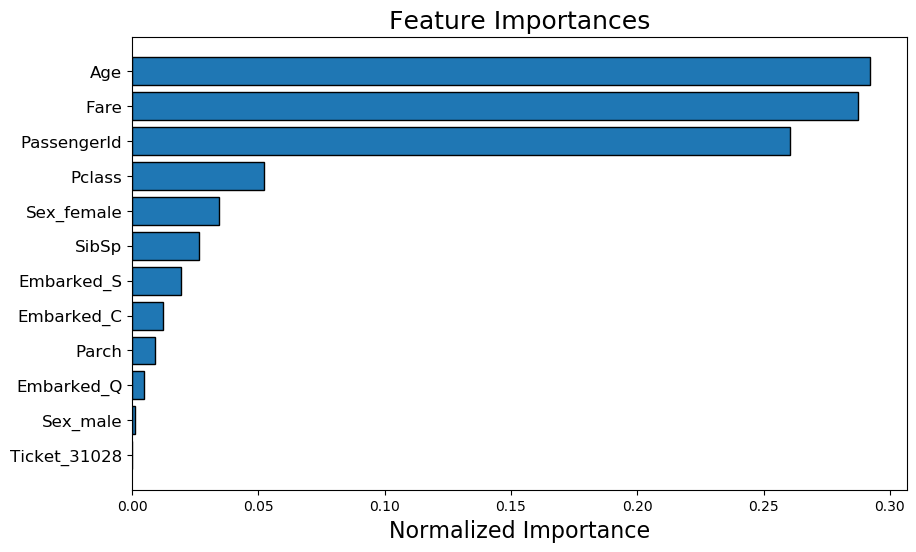

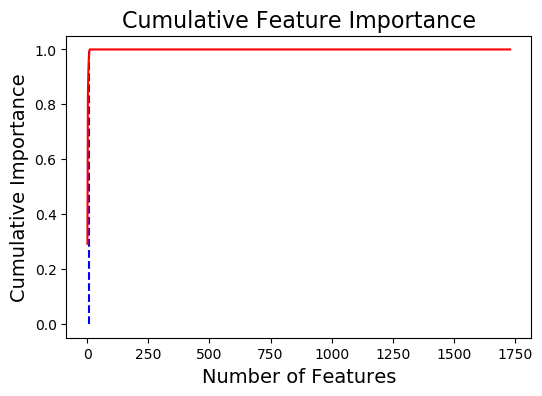

9 features required for 0.99 of cumulative importance


In [18]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [71]:
fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,Age,328.0,0.282929,0.282929
1,Fare,321.0,0.276891,0.559821
2,PassengerId,307.0,0.264815,0.824636
3,Pclass,64.7,0.055810,0.880445
4,Sex_female,39.8,0.034331,0.914776
5,Embarked_S,34.2,0.029501,0.944277
6,SibSp,34.2,0.029501,0.973777
7,Embarked_C,17.9,0.015440,0.989218
8,Parch,9.8,0.008453,0.997671
9,Embarked_Q,2.1,0.001811,0.999482


In [72]:
fs.identify_low_importance(cumulative_importance = 0.99)
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

8 features required for cumulative importance of 0.99 after one hot encoding.
1722 features do not contribute to cumulative importance of 0.99.



['Parch',
 'Embarked_Q',
 'Name_Ali, Mr. Ahmed',
 'Name_Alhomaki, Mr. Ilmari Rudolf',
 'Name_Alexander, Mr. William']

In [73]:
train_no_missing = fs.remove(methods = ['missing'])

Removed 1 features.


In [74]:
train_no_missing_zero = fs.remove(methods = ['missing', 'zero_importance'])

Removed 1720 features.


In [75]:
all_to_remove = fs.check_removal()
all_to_remove[10:25]

Total of 1723 features identified for removal


['Name_Giles, Mr. Frederick Edward',
 'Name_McCormack, Mr. Thomas Joseph',
 'Name_Somerton, Mr. Francis William',
 'Ticket_4134',
 'Name_Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)',
 'Cabin_B41',
 'Ticket_365222',
 'Ticket_349228',
 'Name_Lefebre, Miss. Jeannie',
 'Name_Coxon, Mr. Daniel',
 'Name_Todoroff, Mr. Lalio',
 'Name_Hocking, Mr. Richard George',
 'Ticket_26360',
 'Name_Smith, Mr. Richard William',
 'Ticket_21440']

In [76]:
train_removed = fs.remove(methods = 'all')

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 1723 features.


In [77]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 1726 features including one-hot features.


In [78]:
print('Original Number of Features', dataset.shape[1])
print('Final Number of Features: ', train_removed_all.shape[1])

AttributeError: 'str' object has no attribute 'shape'

In [79]:
dataset_train.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [80]:
Id = dataset_train['PassengerId']

In [81]:
dataset_train = dataset_train.drop(columns = ['PassengerId'])

In [83]:
dataset_train.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [84]:
dataset_train = dataset_train.drop(columns = ['Name'])
dataset_train = dataset_train.drop(columns = ['Ticket'])

In [85]:
type(dataset_train)

pandas.core.frame.DataFrame

In [86]:
dataset_train = dataset_train.drop(columns = ['Cabin'])

In [87]:
dataset_train.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [194]:
dataset_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [118]:
dataset_train
X = train.iloc[:, 0:12].values

In [119]:
X = np.delete(X,0,1)

In [120]:
X = np.delete(X,0,1)

In [122]:
X = np.delete(X,1,1)

In [125]:
X = np.delete(X,6,1)

In [126]:
X

array([[3, 'male', 22.0, ..., 0, 7.25, 'S'],
       [1, 'female', 38.0, ..., 0, 71.2833, 'C'],
       [3, 'female', 26.0, ..., 0, 7.925, 'S'],
       ...,
       [3, 'female', nan, ..., 2, 23.45, 'S'],
       [1, 'male', 26.0, ..., 0, 30.0, 'C'],
       [3, 'male', 32.0, ..., 0, 7.75, 'Q']], dtype=object)

In [110]:
X = np.delete(X,6,1)

In [129]:
X[2][1]


'female'

In [131]:
sex_mapping = {'male': 0, 'female': 1}
d = 0
for d in range (len(X)):
    if(X[d][1] == 'male'):
        X[d][1] = 0
    else:
        X[d][1] = 1

In [132]:
X

array([[3, 0, 22.0, ..., 0, 7.25, 'S'],
       [1, 1, 38.0, ..., 0, 71.2833, 'C'],
       [3, 1, 26.0, ..., 0, 7.925, 'S'],
       ...,
       [3, 1, nan, ..., 2, 23.45, 'S'],
       [1, 0, 26.0, ..., 0, 30.0, 'C'],
       [3, 0, 32.0, ..., 0, 7.75, 'Q']], dtype=object)

In [134]:
Embarked_mapping= {"S": 0, "C": 1, "Q": 2, "NaN":3}
for d in range (len(X)):
    if(X[d][6] == 'S'):
        X[d][6] = 0
    elif(X[d][6] == 'C'):
        X[d][6] = 1
    elif(X[d][6] == 'Q'):
        X[d][6] = 2
    else:
        X[d][6] = 3

In [135]:
X

array([[3, 0, 22.0, ..., 0, 7.25, 0],
       [1, 1, 38.0, ..., 0, 71.2833, 1],
       [3, 1, 26.0, ..., 0, 7.925, 0],
       ...,
       [3, 1, nan, ..., 2, 23.45, 0],
       [1, 0, 26.0, ..., 0, 30.0, 1],
       [3, 0, 32.0, ..., 0, 7.75, 2]], dtype=object)

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [138]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [139]:
imputer = imputer.fit(X[:, 2:3])
X[:, 2:3]= imputer.transform(X[:,2:3])

In [140]:
X

array([[3, 0, 22.0, ..., 0, 7.25, 0],
       [1, 1, 38.0, ..., 0, 71.2833, 1],
       [3, 1, 26.0, ..., 0, 7.925, 0],
       ...,
       [3, 1, 28.0, ..., 2, 23.45, 0],
       [1, 0, 26.0, ..., 0, 30.0, 1],
       [3, 0, 32.0, ..., 0, 7.75, 2]], dtype=object)

In [141]:
y = target

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [145]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [153]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [154]:
numerator = cm[0][0] + cm[1][1]
denominator = sum(cm[0]) + sum(cm[1])
acc_svc = (numerator/denominator) * 100
print("Accuracy : ",round(acc_svc,2),"%")

Accuracy :  81.56 %


In [155]:
#Using xgboost
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [156]:
numerator = cm[0][0] + cm[1][1]
denominator = sum(cm[0]) + sum(cm[1])
acc_svc = (numerator/denominator) * 100
print("Accuracy : ",round(acc_svc,2),"%")

Accuracy :  84.36 %


In [157]:
seed = 222
np.random.seed(seed)
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score


def get_models():
    """Generate a library of base learners."""
    nb = GaussianNB()
    svc = SVC(C=100, probability=True)
    knn = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression(C=100, random_state=seed)
    nn = MLPClassifier((80, 10), early_stopping=False, random_state=seed)
    gb = GradientBoostingClassifier(n_estimators=100, random_state=seed)
    rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=seed)

    models = {'svm': svc,
              'knn': knn,
              'naive bayes': nb,
              'mlp-nn': nn,
              'random forest': rf,
              'gbm': gb,
              'logistic': lr,
              }

    return models


def train_predict(model_list):
    """Fit models in list on training set and return preds"""
    P = np.zeros((y_test.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(X_train, y_train)
        P.iloc[:, i] = m.predict_proba(X_test)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P


def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        score = roc_auc_score(y, P.loc[:, m])
        print("%-26s: %.3f" % (m, score))
    print("Done.\n")

In [158]:
models = get_models()
P = train_predict(models)
score_models(P, y_test)

Fitting models.
svm... done
knn... done
naive bayes... done
mlp-nn... done
random forest... done
gbm... done
logistic... done
Done.

Scoring models.
svm                       : 0.806
knn                       : 0.843
naive bayes               : 0.853
mlp-nn                    : 0.872
random forest             : 0.873
gbm                       : 0.903
logistic                  : 0.867
Done.



C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [159]:
#Using gbm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=seed)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [160]:
numerator = cm[0][0] + cm[1][1]
denominator = sum(cm[0]) + sum(cm[1])
acc_svc = (numerator/denominator) * 100
print("Accuracy : ",round(acc_svc,2),"%")

Accuracy :  85.47 %


In [161]:
from sklearn.model_selection import cross_val_score
cross_val_svc = cross_val_score(estimator = gb, X = X_train, y = y_train, cv = 10, n_jobs = -1)
print("Cross Validation Accuracy : ",round(cross_val_svc.mean() * 100 , 2),"%")

Cross Validation Accuracy :  82.72 %


In [162]:
dataset_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [163]:
Id2 = dataset_test['PassengerId']

In [167]:
dataset_test = dataset_test.drop(columns = ['PassengerId'])

In [168]:
dataset_test = dataset_test.drop(columns = ['Name'])
dataset_test = dataset_test.drop(columns = ['Cabin'])

In [170]:
dataset_test = dataset_test.drop(columns = ['Ticket'])

In [171]:
dataset_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [176]:
test_x = dataset_test.iloc[:, 0:7].values

In [177]:
test_x

array([[3, 'male', 34.5, ..., 0, 7.8292, 'Q'],
       [3, 'female', 47.0, ..., 0, 7.0, 'S'],
       [2, 'male', 62.0, ..., 0, 9.6875, 'Q'],
       ...,
       [3, 'male', 38.5, ..., 0, 7.25, 'S'],
       [3, 'male', nan, ..., 0, 8.05, 'S'],
       [3, 'male', nan, ..., 1, 22.3583, 'C']], dtype=object)

In [178]:
sex_mapping = {'male': 0, 'female': 1}
d = 0
for d in range (len(test_x)):
    if(test_x[d][1] == 'male'):
        test_x[d][1] = 0
    else:
        test_x[d][1] = 1

In [190]:
Embarked_mapping= {"S": 0, "C": 1, "Q": 2, "NaN":3}
for d in range (len(test_x)):
    if(test_x[d][6] == 'S'):
        test_x[d][6] = 0
    elif(test_x[d][6] == 'C'):
        test_x[d][6] = 1
    elif(test_x[d][6] == 'Q'):
        test_x[d][6] = 2
    else:
        test_x[d][6] = 3

In [191]:
test_x

array([[ 0.87348191, -0.75592895,  0.38623105, ..., -0.4002477 ,
         3.        ,  2.24316522],
       [ 0.87348191,  1.32287566,  1.37137004, ..., -0.4002477 ,
         3.        , -0.6778412 ],
       [-0.31581919, -0.75592895,  2.55353683, ..., -0.4002477 ,
         3.        ,  2.24316522],
       ...,
       [ 0.87348191, -0.75592895,  0.70147553, ..., -0.4002477 ,
         3.        , -0.6778412 ],
       [ 0.87348191, -0.75592895, -0.20485235, ..., -0.4002477 ,
         3.        , -0.6778412 ],
       [ 0.87348191, -0.75592895, -0.20485235, ...,  0.61989583,
         3.        ,  0.78266201]])

In [192]:
imputer = imputer.fit(test_x[:, 2:3])
test_x[:, 2:3]= imputer.transform(test_x[:,2:3])

In [195]:
imputer = imputer.fit(test_x[:, 5:6])
test_x[:, 5:6]= imputer.transform(test_x[:,5:6])

In [196]:
test_x = sc_X.fit_transform(test_x)

In [197]:
final = y_pred = gb.predict(test_x)

In [199]:
submission = pd.DataFrame({'PassengerId': Id2, 'Survived': final})
submission.to_csv('submission1.csv', index=False)
